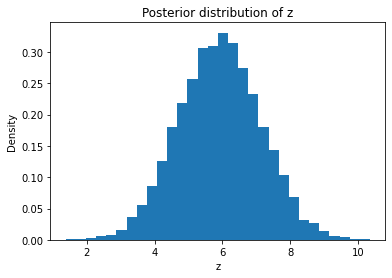

In [4]:
import numpy as np
from scipy.stats import norm, beta
import matplotlib.pyplot as plt

def gibbs_sampler(x, y, alpha, bt, num_iterations, burn_in):
    # Initialize z and p
    z = np.mean([x, y])
    p = beta.rvs(alpha, bt)

    # Initialize arrays to store samples
    z_samples = np.zeros(num_iterations)
    p_samples = np.zeros(num_iterations)

    for i in range(num_iterations):
        # Sample z from its conditional distribution
        mu_z = (p * np.mean(x)) + ((1 - p) * np.mean(y))
        sigma_z = np.sqrt((np.var(x) * np.var(y)) / (np.var(x) + np.var(y)))
        z = norm.rvs(mu_z, sigma_z)

        # Sample p from its conditional distribution
        a = alpha + 0.5
        b = bt + 0.5
        p = beta.rvs(a, b)

        # Store samples
        z_samples[i] = z
        p_samples[i] = p

    # Discard burn-in samples and return posterior samples
    return z_samples[burn_in:], p_samples[burn_in:]


# Generate some data
np.random.seed(42)
x = np.random.normal(loc=5, scale=2, size=100)
y = np.random.normal(loc=7, scale=1.5, size=100)

# Run the Gibbs sampler
z_samples, p_samples = gibbs_sampler(x, y, 2, 2, 10000, 1000)

# Plot the posterior distribution of z
plt.hist(z_samples, bins=30, density=True)
plt.title("Posterior distribution of z")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()

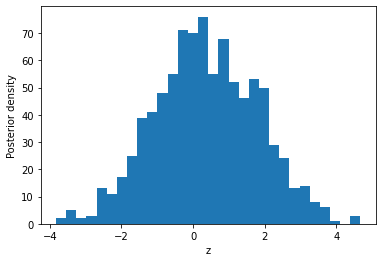

In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def gibbs_sampler(x, y, num_iterations, burn_in):
    # Initialize z
    z = np.mean([x, y])

    # Initialize array to store samples
    z_samples = np.zeros(num_iterations)

    for i in range(num_iterations):
        # Sample z from its conditional distribution
        mu_z = np.mean([x, y])
        sigma_z = np.sqrt(np.var(x) + np.var(y))
        z = norm.rvs(mu_z, sigma_z)

        # Store sample
        z_samples[i] = z

    # Discard burn-in samples and return posterior samples
    return z_samples[burn_in:]

import matplotlib.pyplot as plt

# Generate some example data
x = np.random.normal(0, 1, size=100)
y = np.random.normal(1, 1, size=100)

# Run the Gibbs sampler
num_iterations = 1000
burn_in = 100
z_samples = gibbs_sampler(x, y, num_iterations, burn_in)

# Plot the posterior distribution of z
plt.hist(z_samples, bins=30)
plt.xlabel('z')
plt.ylabel('Posterior density')
plt.show()


# Example 5.10

In [16]:
import numpy as np
from scipy.stats import norm, gamma, bernoulli

# Set up prior hyperparameters
alpha = 1
beta = 1
xi = 0
psi = 1
N=100
w1=np.random.normal(-5, 1, size=int(N/2))
w2=np.random.normal(5, 1, size=int(N/2))


# Set up initial values
tau = 1 / np.var(np.concatenate((w1, w2)))
mu1 = np.mean(w1)
mu2 = np.mean(w2)
s = np.zeros(N)

# Define the conditional distributions
def sample_tau(mu1, mu2, s, w):
    alpha_new = alpha + N / 2
    beta_new = beta + np.sum((w - mu1 * s - mu2 * (1 - s)) ** 2) / 2
    return gamma.rvs(alpha_new, scale=1/beta_new)

def sample_mu1(tau, mu2, s, w):
    psi_new = psi + np.sum(s)
    xi_new = (psi * xi + np.sum(w * s)) / psi_new
    return norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new * tau))

def sample_mu2(tau, mu1, s, w):
    psi_new = psi + np.sum(1 - s)
    xi_new = (psi * xi + np.sum(w * (1 - s))) / psi_new
    return norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new * tau))

def sample_s(tau, mu1, mu2, w):
    p = np.array([norm.pdf(w, loc=mu1, scale=1/np.sqrt(tau)), 
                  norm.pdf(w, loc=mu2, scale=1/np.sqrt(tau))])
    p *= np.array([1 - omega, omega]).reshape(-1, 1)
    p /= np.sum(p, axis=0)
    return bernoulli.rvs(p[1])

# Run the Gibbs sampler
num_iterations = 1000
burn_in = 100
samples = np.zeros((num_iterations, 4 + N))
for i in range(num_iterations):
    tau = sample_tau(mu1, mu2, s, np.concatenate((w1, w2)))
    mu1 = sample_mu1(tau, mu2, s, w1)
    mu2 = sample_mu2(tau, mu1, s, w2)
    s = sample_s(tau, mu1, mu2, np.concatenate((w1, w2)))
    samples[i] = np.concatenate((tau.reshape(1,), mu1.reshape(1,), mu2.reshape(1,), s))
samples = samples[burn_in:]

# Plot the posterior distributions
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Plot the posterior distribution of tau
plt.subplot(2, 2, 1)
plt.hist(samples[:, 0], bins=30)
plt.xlabel('tau')
plt.ylabel('Posterior density')

# Plot the posterior distribution of mu1
plt.subplot(2, 2, 2)
plt.hist(samples[:, 1], bins=30)
plt.xlabel('mu1')
plt.ylabel('Posterior density')

# Plot the posterior distribution of mu2
plt.subplot(2, 2, 3)
plt.hist(samples[:, 2], bins=30)
plt.xlabel('mu2')
plt.ylabel('Posterior density')

# Plot the posterior distribution of s
# plt.subplot(2, 2, 4)
# plt.hist(samples[:, 3:], bins=30, label=['s{}'.format(i+1) for i in range(N


ValueError: operands could not be broadcast together with shapes (50,) (100,) 

In [7]:
import numpy as np
import scipy.stats as stats

# Set up prior parameters
alpha = 1
beta = 1
xi = 0
psi = 1

# Set up initial values for parameters and indicators
tau = 1 / np.var(np.concatenate([w1, w2]))
mu1 = np.mean(w1)
mu2 = np.mean(w2)
s = np.zeros(N, dtype=int)

# Define conditional posterior distributions for each parameter
def sample_tau(mu1, mu2, s, w1, w2):
    alpha_new = alpha + N/2
    beta_new = beta + 0.5 * (np.sum((w1 - mu1*s)**2) + np.sum((w2 - mu2*(1-s))**2))
    return stats.gamma.rvs(alpha_new, scale=1/beta_new)

def sample_mu1(tau, mu2, w1, s):
    psi_new = psi + np.sum(s)
    xi_new = (psi*xi + np.sum(w1*s)) / (psi + np.sum(s))
    return stats.norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new*tau))

def sample_mu2(tau, mu1, w2, s):
    psi_new = psi + np.sum(1-s)
    xi_new = (psi*xi + np.sum(w2*(1-s))) / (psi + np.sum(1-s))
    return stats.norm.rvs(loc=xi_new, scale=1/np.sqrt(psi_new*tau))

def sample_s(tau, mu1, mu2, w1, w2):
    log_odds = np.zeros(2)
    log_odds[0] = np.sum(stats.norm.logpdf(w1, loc=mu1, scale=np.sqrt(1/tau)))
    log_odds[1] = np.sum(stats.norm.logpdf(w2, loc=mu2, scale=np.sqrt(1/tau)))
    log_odds[1] += np.log(1 - omega)
    log_odds -= np.max(log_odds) # subtract maximum to avoid overflow
    odds = np.exp(log_odds)
    probs = odds / np.sum(odds)
    return stats.binom.rvs(n=1, p=probs[1])

# Run the Gibbs sampler
num_iterations = 1000
burn_in = 100
samples = np.zeros((num_iterations, 4 + N), dtype=np.float64)

for i in range(num_iterations):
    tau = sample_tau(mu1, mu2, s, w1, w2)
    mu1 = sample_mu1(tau, mu2, w1, s)
    mu2 = sample_mu2(tau, mu1, w2, s)
    for j in range(N):
        s[j] = sample_s(tau, mu1, mu2, w1[j], w2[j])
    samples[i, :] = [tau, mu1, mu2, *s]

samples = samples[burn_in:, :] # discard burn-in samples

# Plot the posterior distributions of the parameters
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.hist(samples[:, 0], bins=30)
plt.xlabel(r'$\tau$')
plt.ylabel('Posterior density')
plt.subplot(2, 2, 2)
plt.hist(samples[:, 1], bins=30)
plt.xlabel(r'$\mu_1$')
# plt.ylabel('Post

NameError: name 'w1' is not defined

In [17]:
np.random.beta(alpha, beta)

0.8917669460297308

In [ ]:
import numpy as np
import scipy.stats as stats

# Generate some synthetic data from a mixture of two normal distributions
n = 100
theta = 0.4  # True value of mixing proportion
mu = [-5, 5]  # True values of means
tau = 1  # True value of precision (inverse variance)
s = np.random.binomial(n=1, p=theta, size=n)  # True values of mixture components
x = np.random.normal(loc=mu[s], scale=np.sqrt(1/tau))

# Initialize parameters
pi = 0.5  # Prior parameter for mixing proportion
alpha = 1  # Prior hyperparameter for beta distribution
beta = 1  # Prior hyperparameter for beta distribution
mu1 = 0  # Prior mean for first component
mu2 = 0  # Prior mean for second component
tau = 1  # Prior precision for both components

# Define functions to update each parameter using Gibbs sampling
def update_s(x, pi, mu1, mu2, tau):
    s = np.zeros_like(x, dtype=int)
    for i, xi in enumerate(x):
        p1 = stats.norm.pdf(xi, loc=mu1, scale=np.sqrt(1/tau))
        p2 = stats.norm.pdf(xi, loc=mu2, scale=np.sqrt(1/tau))
        s[i] = np.random.choice([0, 1], p=[pi*p1, (1-pi)*p2])
    return s

def update_pi(s, alpha, beta):
    n1 = np.sum(s == 0)
    n2 = np.sum(s == 1)
    pi = np.random.beta(alpha + n1, beta + n2)
    return pi

def update_mu1(s, x, tau, mu1_0, sigma2_0):
    n = np.sum(s == 0)
    x1 = x[s == 0]
    tau_n = tau * n
    sigma2_n = 1 / (1/sigma2_0 + n/tau)
    mu1_n = (mu1_0/sigma2_0 + np.sum(x1)/tau) / (1/sigma2_0 + n/tau)
    mu1 = np.random.normal(mu1_n, np.sqrt(sigma2_n))
    return mu1

def update_mu2(s, x, tau, mu2_0, sigma2_0):
    n = np.sum(s == 1)
    x2 = x[s == 1]
    tau_n = tau * n
    sigma2_n = 1 / (1/sigma2_0 + n/tau)
    mu2_n = (mu2_0/sigma2_0 + np.sum(x2)/tau) / (1/sigma2_0 + n/tau)
    mu2 = np.random.normal(mu2_n, np.sqrt(sigma2_n))
    return mu2

def update_tau(s, x, mu1, mu2, alpha, beta):
    n1 = np.sum(s == 0)
    n2 = np.sum(s == 1)
    x1 = x[s == 0]
    x2 = x[s == 1]
    alpha_n = alpha + n1/2 + n2/2
    beta_n = beta + np.sum((x1-mu1)**2)/2 + np.sum((x2-mu2)**2)/2
    tau = np.random.gamma(alpha_n, 1/beta_n)
    return tau



In [20]:
import numpy as np
from scipy.stats import norm, beta
from tqdm.notebook import tqdm,trange
# Set the hyperparameters of the Beta prior on pi1
a = 1
b = 1

# Set the prior mean and precision of mu1 and mu2
mu01 = 0
mu02 = 0
k1 = 1
k2 = 1

# Generate some toy data from a mixture of two Normal distributions
pi1_true = 0.6
mu1_true = 2
mu2_true = -2
tau_true = 1
N = 100
s = np.random.binomial(1, pi1_true, size=N)
w = s * np.random.normal(mu1_true, np.sqrt(1/tau_true), size=N) + (1-s) * np.random.normal(mu2_true, np.sqrt(1/tau_true), size=N)

# Initialize the variables
pi1 = np.random.beta(a, b)
mu1 = np.random.normal(mu01, np.sqrt(1/k1))
mu2 = np.random.normal(mu02, np.sqrt(1/k2))
tau = np.random.gamma(1, 1)
s = np.random.binomial(1, pi1, size=N)

posterior_samples=[]
# Set the number of iterations and burn-in period
num_iters = 1000
burn_in = 100

# Run the Gibbs sampler
for i in trange(num_iters):
    # Update the latent variables s1:N
    for j in range(N):
        p1 = pi1 * norm.pdf(w[j], mu1, np.sqrt(1/tau))
        p2 = (1-pi1) * norm.pdf(w[j], mu2, np.sqrt(1/tau))
        s[j] = np.random.binomial(1, p1 / (p1+p2))
    
    # Update the mixing proportion pi1
    N1 = np.sum(s)
    N2 = N - N1
    pi1 = np.random.beta(a + N1, b + N2)
    
    # Update the mean mu1
    x1 = np.mean(w[s==1])
    v1 = 1 / (N1*tau + k1)
    m1 = v1 * (N1*tau*x1 + k1*mu01)
    mu1 = np.random.normal(m1, np.sqrt(v1))
    
    # Update the mean mu2
    x2 = np.mean(w[s==0])
    v2 = 1 / (N2*tau + k2)
    m2 = v2 * (N2*tau*x2 + k2*mu02)
    mu2 = np.random.normal(m2, np.sqrt(v2))
    
    # Update the precision tau
    ss1 = np.sum(s*(w-mu1)**2)
    ss2 = np.sum((1-s)*(w-mu2)**2)
    a_tau = 0.5*(N1+N2) + 1
    b_tau = 0.5*(ss1+ss2) + 1
    tau = np.random.gamma(a_tau, 1/b_tau)
    
    # Save the posterior samples after the burn-in period
    if i > burn_in:
        posterior_samples.append((s, pi1, mu1, mu2, tau))


  0%|          | 0/1000 [00:00<?, ?it/s]

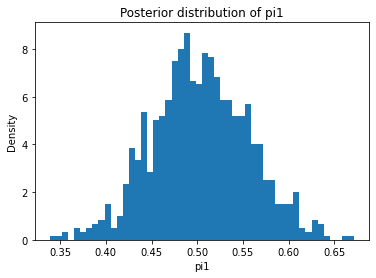

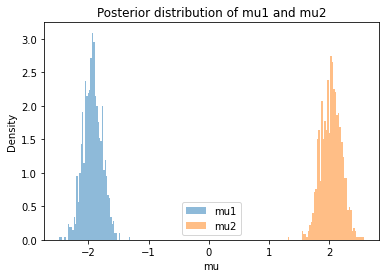

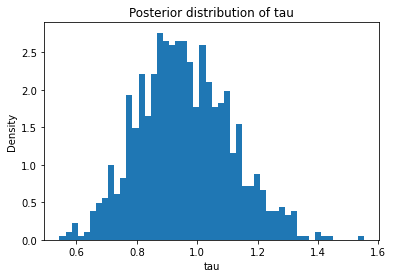

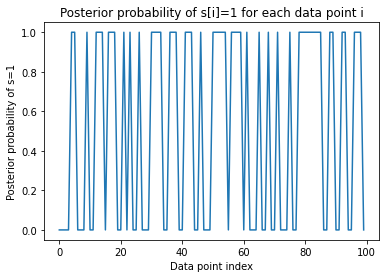

In [21]:
import matplotlib.pyplot as plt

# Extract the posterior samples for the variables of interest
s_samples = np.array([sample[0] for sample in posterior_samples])
pi1_samples = np.array([sample[1] for sample in posterior_samples])
mu1_samples = np.array([sample[2] for sample in posterior_samples])
mu2_samples = np.array([sample[3] for sample in posterior_samples])
tau_samples = np.array([sample[4] for sample in posterior_samples])

# Plot the posterior distribution of pi1
plt.hist(pi1_samples, bins=50, density=True)
plt.xlabel('pi1')
plt.ylabel('Density')
plt.title('Posterior distribution of pi1')
plt.show()

# Plot the posterior distribution of mu1 and mu2
plt.hist(mu1_samples, bins=50, density=True, alpha=0.5, label='mu1')
plt.hist(mu2_samples, bins=50, density=True, alpha=0.5, label='mu2')
plt.xlabel('mu')
plt.ylabel('Density')
plt.title('Posterior distribution of mu1 and mu2')
plt.legend()
plt.show()

# Plot the posterior distribution of tau
plt.hist(tau_samples, bins=50, density=True)
plt.xlabel('tau')
plt.ylabel('Density')
plt.title('Posterior distribution of tau')
plt.show()

# Plot the posterior probability of s[i]=1 for each data point i
plt.plot(np.mean(s_samples, axis=0))
plt.xlabel('Data point index')
plt.ylabel('Posterior probability of s=1')
plt.title('Posterior probability of s[i]=1 for each data point i')
plt.show()